#### EXPLORATORY DATA ANALYSIS
___

## EXERCISE II. SAHEL DATASET SUPPORTING USE CASE

This notebook introduces specific techniques to conduct data analysis and in particular data visualization of time series.

We have provided in the `data/` folder a time series of monthly temperature in several African countries from 1901 to 2005.

* **tas**: near surface monthly mean air temperature

Sources: http://sdwebx.worldbank.org/climateportal/index.cfm?page=downscaled_data_download&menu=historical

In [55]:
import matplotlib.pyplot as plt
import datetime
import json
#import requests
import pandas as pd
import numpy as np
from pandas import TimeGrouper

# This ensures visualizations are plotted inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

import warnings
warnings.filterwarnings('ignore')

## I. Data loading

In [7]:
# Take a look at Pandas doc. for read_csv method: 
#   - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Load data with default parameters to take a look at the data structure
pd.read_csv('data/tas_1901_2015_sahel.csv').head()

,tas,year,month,country
0,12.0806,1901,1,DZA
1,14.2311,1901,2,DZA
2,17.8110,1901,3,DZA
3,22.6980,1901,4,DZA
4,25.9776,1901,5,DZA


In [10]:
# Looks like year and month are in two separate columns, so to concatenate and parse them as date
pd.read_csv('data/tas_1901_2015_sahel.csv', parse_dates=[[1, 2]]).head()

,year_month,tas,country
0,1901-01-01,12.0806,DZA
1,1901-02-01,14.2311,DZA
2,1901-03-01,17.8110,DZA
3,1901-04-01,22.6980,DZA
4,1901-05-01,25.9776,DZA


In [11]:
# Finally, specify that the newly created column is our index
df_tas = pd.read_csv('data/tas_1901_2015_sahel.csv', parse_dates=[[1, 2]], index_col=0)

In [12]:
df_tas.head()

,tas,country
year_month,,
1901-01-01,12.0806,DZA
1901-02-01,14.2311,DZA
1901-03-01,17.8110,DZA
1901-04-01,22.6980,DZA
1901-05-01,25.9776,DZA


In [13]:
df_country_code = pd.read_csv('data/country_codes.csv')
df_country_code.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


## II. Data preparation

In [14]:
# Renaming row index
df_tas.index.name = 'date'

In [18]:
# Joining time series with country code to get country names based on ISO code
# When merging the index is lost so temporarily reset it an set it afain after merge
df_tas = pd.merge(df_tas.reset_index(), df_country_code, left_on='country', right_on='alpha-3').set_index('date')

In [19]:
df_tas  = df_tas.iloc[:,[0,1,2]]
df_tas.columns = ['temperature', 'country_iso', 'country_name']

In [20]:
df_tas.head()

,temperature,country_iso,country_name
date,,,
1901-01-01,12.0806,DZA,Algeria
1901-02-01,14.2311,DZA,Algeria
1901-03-01,17.8110,DZA,Algeria
1901-04-01,22.6980,DZA,Algeria
1901-05-01,25.9776,DZA,Algeria


## III. A quick tour of time series data visualization

In [21]:
# Here below the list of included countries 
df_tas['country_name'].value_counts()

Somalia         1380
Mauritania      1380
Chad            1380
Algeria         1380
Mali            1380
Senegal         1380
Niger           1380
Ethiopia        1380
Djibouti        1380
Burkina Faso    1380
Sudan           1380
Cabo Verde      1380
Eritrea         1380
Nigeria         1380
Name: country_name, dtype: int64

In [22]:
# Now comes the magic of Pandas
df_tas_piv = df_tas.pivot(columns='country_name', values='temperature')

In [23]:
df_tas_piv.head()

country_name,Algeria,Burkina Faso,Cabo Verde,Chad,Djibouti,Eritrea,Ethiopia,Mali,Mauritania,Niger,Nigeria,Senegal,Somalia,Sudan
date,,,,,,,,,,,,,,
1901-01-01,12.0806,22.9305,21.3606,20.6576,23.6027,22.7404,21.4340,19.5444,19.4163,18.5863,23.9749,24.4492,25.0881,22.2717
1901-02-01,14.2311,27.5229,21.5441,23.1814,24.9196,24.6940,23.0475,23.9585,22.6030,21.8448,26.8343,26.8650,25.9463,25.1677
1901-03-01,17.8110,29.2438,21.6221,26.5562,26.2823,25.5125,23.8133,26.1571,23.5929,25.7290,28.6221,26.6124,27.2407,27.1083
1901-04-01,22.6980,31.3461,22.6734,29.5472,27.6365,27.1085,23.9284,30.1220,27.8172,30.1135,29.6657,29.5977,28.0200,28.9440
1901-05-01,25.9776,30.2692,21.5232,30.9551,29.4531,28.8672,23.8515,31.8213,30.4039,32.3302,28.8563,30.2981,28.0470,30.4281


#### Visualizing all data at once

Text(0, 0.5, 'Near surface monthly mean air temperature (°C)')

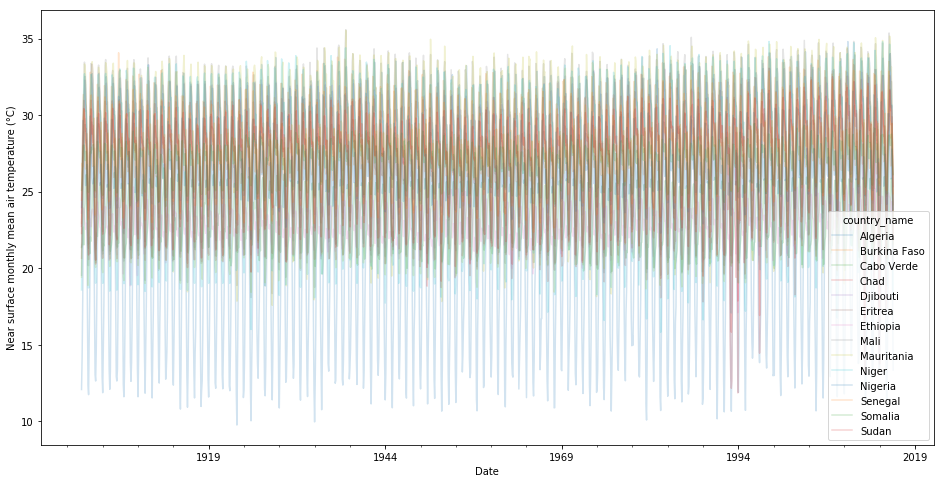

In [41]:
df_tas_piv.plot(alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Near surface monthly mean air temperature (°C)')

#### Visualizing several of them from far West to far East

Text(0, 0.5, 'Near surface monthly mean air temperature (°C)')

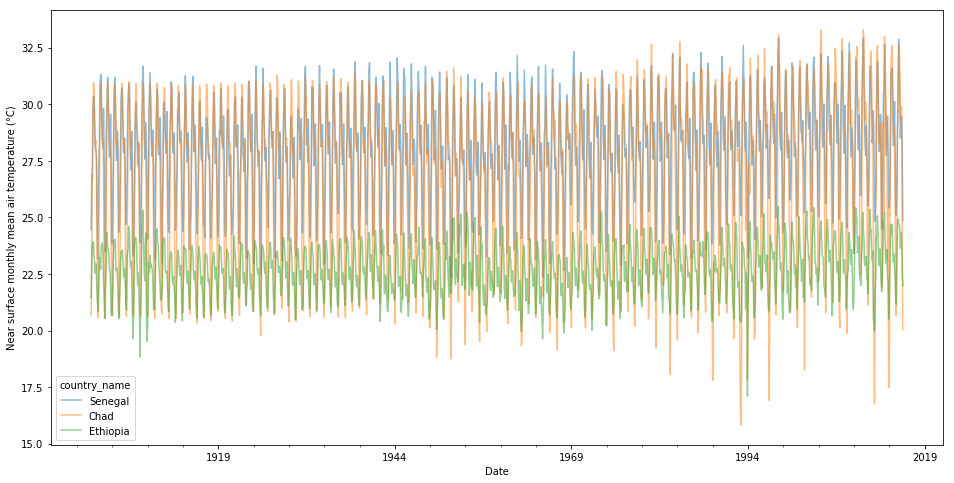

In [42]:
df_tas_piv[['Senegal', 'Chad', 'Ethiopia']].plot(alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Near surface monthly mean air temperature (°C)')

#### Visualizing several of them from far West to far East (20 years)

Text(0, 0.5, 'Near surface monthly mean air temperature (°C)')

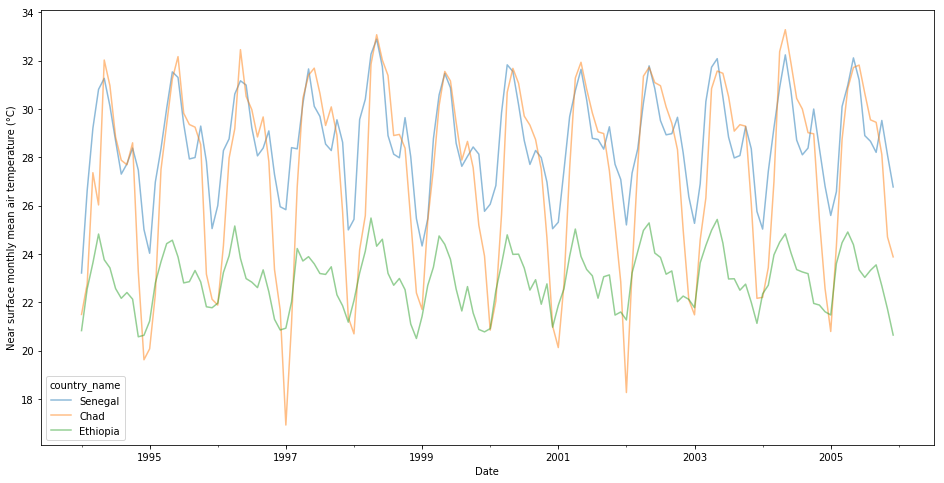

In [43]:
df_tas_piv.loc['1994':'2005',['Senegal', 'Chad', 'Ethiopia']].plot(alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Near surface monthly mean air temperature (°C)')

#### Plotting several time series - faceting

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126535ac8>,
      dtype=object)

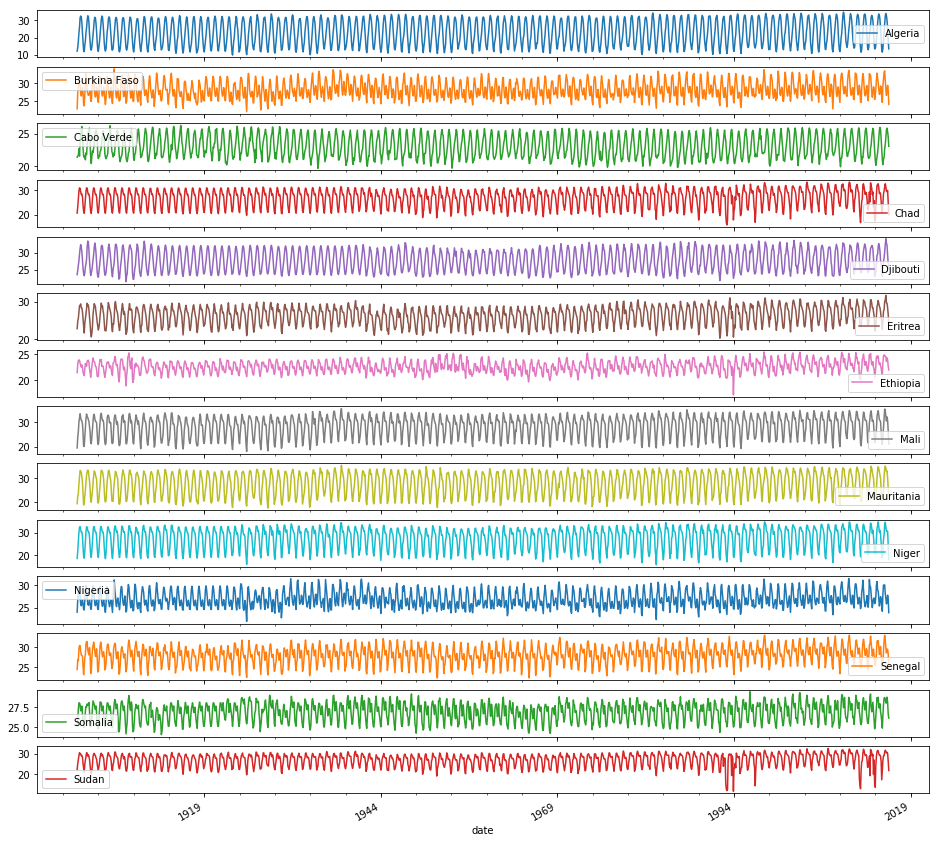

In [44]:
df_tas_piv.plot(subplots=True, figsize=(16, 16))

#### Histogram

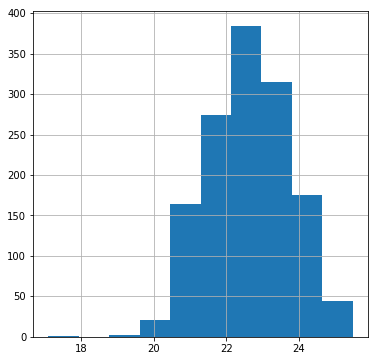

In [46]:
df_tas_piv['Ethiopia'].hist(figsize=(6,6))

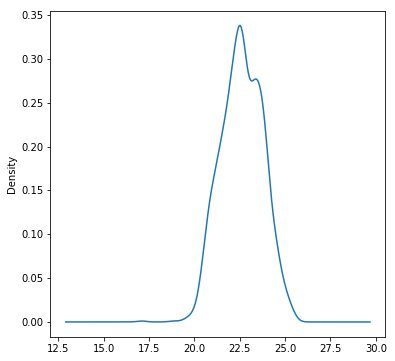

In [48]:
# Density plot
df_tas_piv['Ethiopia'].plot(kind='kde', figsize=(6,6))

#### Box and whisker plots by interval
Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.

This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.


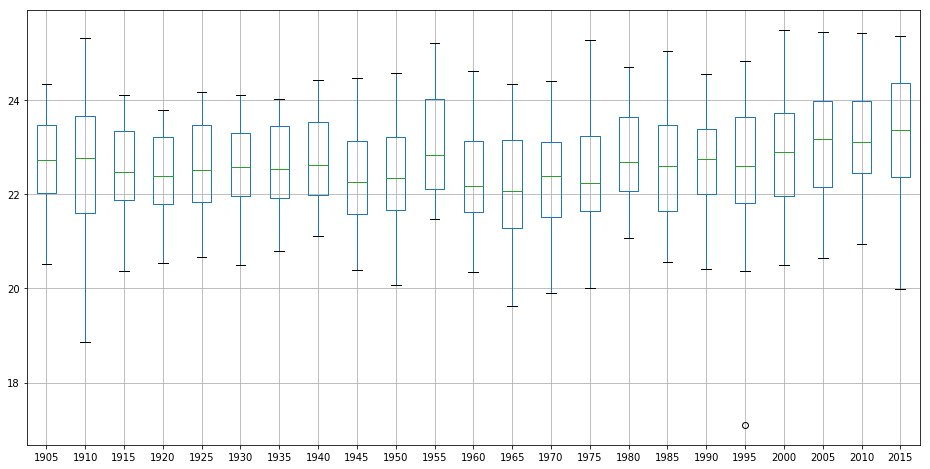

In [56]:
# Every five years
groups = df_tas_piv['Ethiopia'].groupby(TimeGrouper('5A', closed = 'left'))
every_5_years = pd.DataFrame()
for name, group in groups:
  every_5_years[name.year] = group.values
every_5_years.boxplot(figsize=(16,8))

#### Heatmap
Another way to visualize a time series is to use what's called a heatmap: each cell shows the temperature (color encoded) at a given year and month. It provides an other perspective to your data and might reveal patterns that was not easily identified otherwise. 

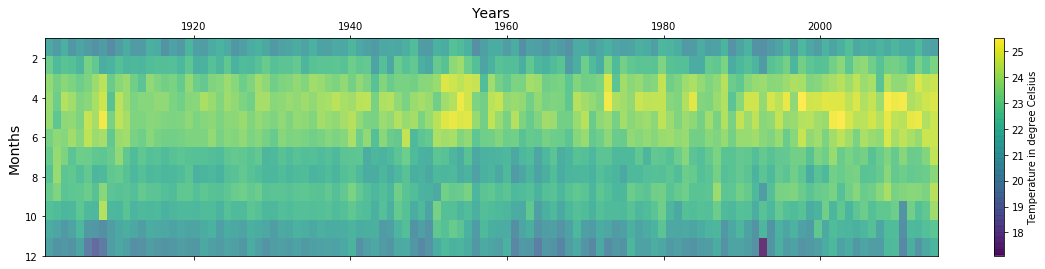

In [62]:
plt.rcParams['figure.figsize'] = (20, 4)

groups = df_tas_piv['Ethiopia'].groupby(TimeGrouper('A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

fig = plt.figure()
ax = fig.add_subplot(111)

# Look at https://matplotlib.org/users/colormaps.html for cmap possible values
cax = ax.matshow(years, interpolation=None, aspect='auto',  cmap='viridis', alpha=0.8, extent=[1901,2015,12,1])
fig.colorbar(cax, label='Temperature in degree Celsius')

plt.xlabel('Years', fontsize=14)
plt.ylabel('Months', fontsize=14)
ax.xaxis.set_label_position('top')

#### Resampling
We noticed that our data has been collected monthly from 1901 up to 2015. Instead, we might be interesting to timely aggregate these data to visualize the mean temperature by year. This can be easily done using the `resample` method, where we decide the frequency of interest and the aggregation calculation (mean, max, ...).

Let's visualize yeary average temperature in Ethiopia and Burundi:

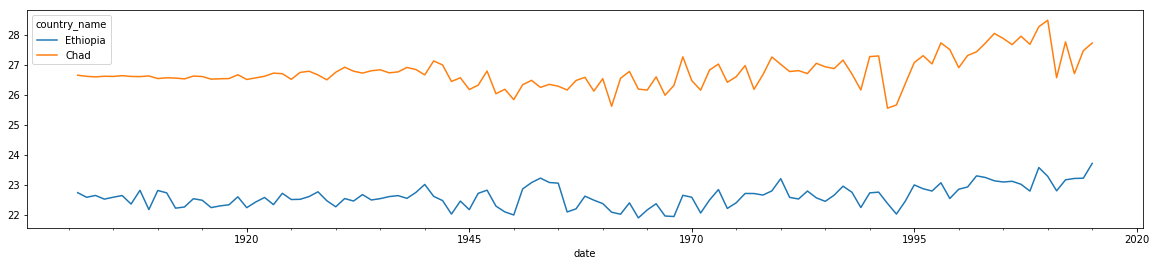

In [63]:
# Yearly mean
df_tas_piv[['Ethiopia', 'Chad']].resample('A').mean().plot()

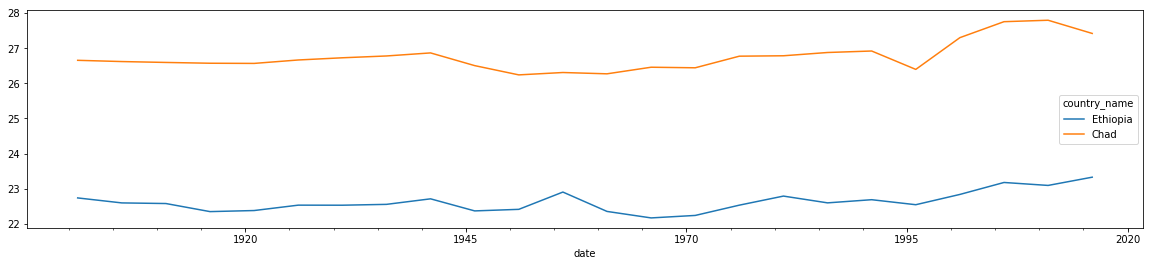

In [64]:
# Every 5 years mean
df_tas_piv[['Ethiopia', 'Chad']].resample('5A').mean().plot()

## ▸ Exercise: Time series visualization
___
1. Choose and download a time series dataset of interest here: https://datamarket.com/data/list/?q=provider:tsdl
2. Replicate the whole data visualization pipeline highlighted above

In [67]:
# YOUR CODE BELOW